# Scale-free networks

In [1]:
# Enable multiple outputs of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [45]:
import networkx as nx
import matplotlib.pyplot as plt 
import statistics as st
import pandas as pd


## Degree distributions of real networks (approximately following the power law)

In [13]:
G1=nx.read_edgelist("/Users/dongjiaoge/Desktop/MA214/Week 25/email-univ/email-univ.edges",
                      nodetype=int)
G2=nx.read_edgelist("/Users/dongjiaoge/Desktop/MA214/Week 25/soc-academia/soc-academia.edges", 
                    nodetype=int)

In [14]:
len(G1.nodes())
len(G1.edges())
len(G2.nodes())
len(G2.edges())

1133

5451

200169

1022883

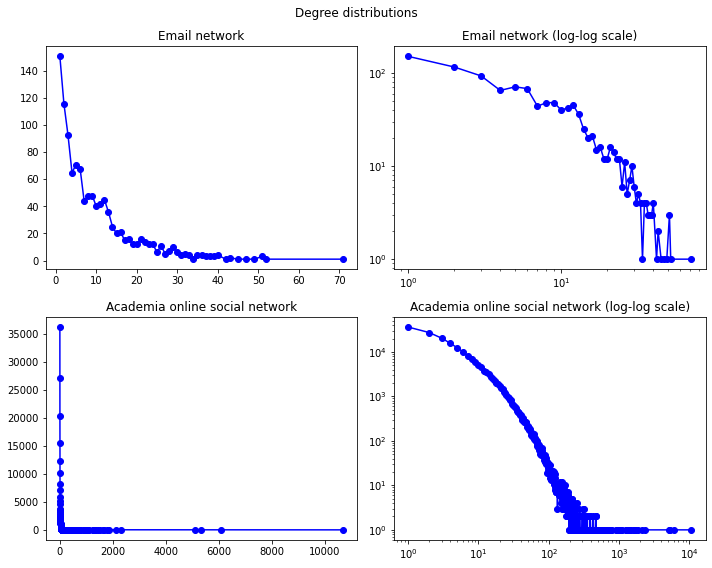

In [15]:
degrees1=dict(nx.degree(G1))
degree_sequence1=sorted(set(degrees1.values()),reverse=True) # degree sequence
hist1 = [list(degrees1.values()).count(x) for x in degree_sequence1]

degrees2=dict(nx.degree(G2))
degree_sequence2=sorted(set(degrees2.values()),reverse=True) # degree sequence
hist2 = [list(degrees2.values()).count(x) for x in degree_sequence2]


fig, axs = plt.subplots(2, 2);
fig.suptitle('Degree distributions');
axs[0,0].plot(degree_sequence1, hist1, 'b', marker='o');
axs[0,0].set_title("Email network");

axs[0,1].loglog(degree_sequence1,hist1,'b',marker='o');
axs[0,1].set_title("Email network (log-log scale)");

axs[1,0].plot(degree_sequence2, hist2, 'b', marker='o');
axs[1,0].set_title("Academia online social network");

axs[1,1].loglog(degree_sequence2,hist2,'b',marker='o');
axs[1,1].set_title("Academia online social network (log-log scale)");

fig.set_size_inches(10, 8)

fig.tight_layout();



## Barabasi-Albert model

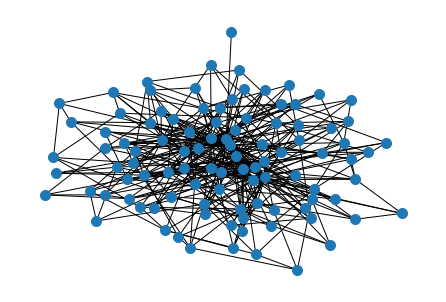

In [52]:
t=96
m0=4
n_star=m0 # In networkx n_star=m0
G=nx.barabasi_albert_graph(n=(n_star+t), m=m0)
nx.draw(G, node_size=100)

In [27]:
print("The number of nodes:", len(G.nodes()))
print("The number of edges:", len(G.edges()))
print("The average degree distribution:", st.mean(dict(nx.degree(G)).values()))

The number of nodes: 100
The number of edges: 384
The average degree distribution: 7.68


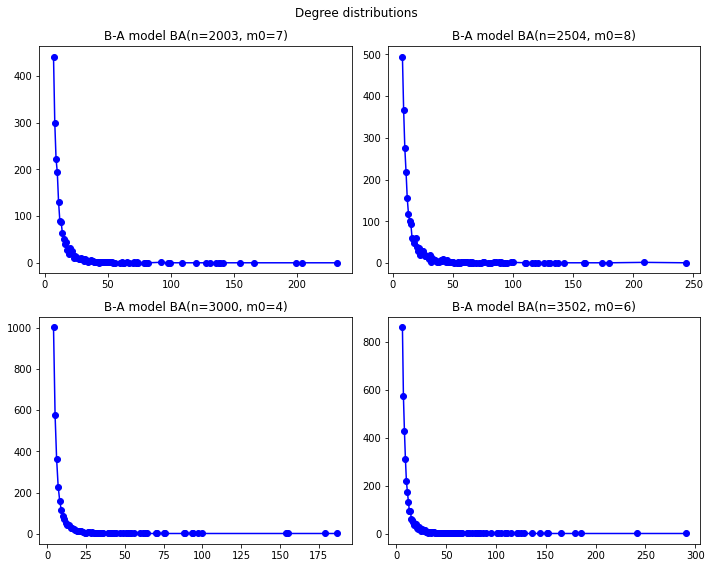

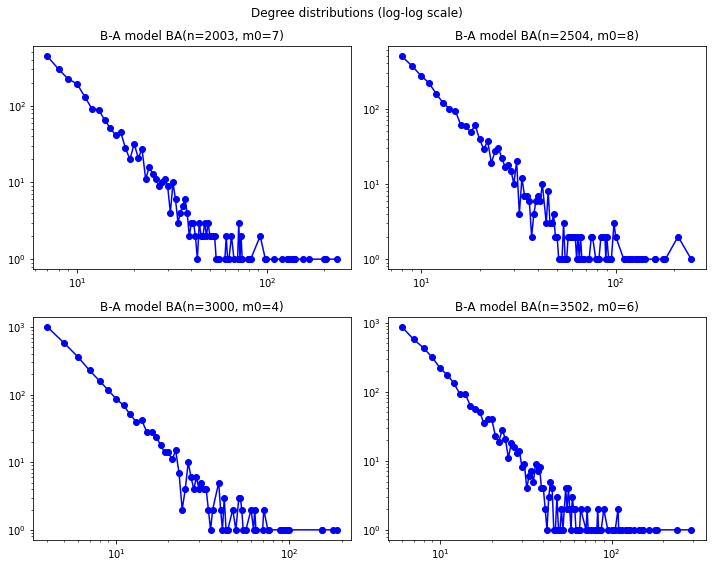

In [44]:
t=[1996, 2496, 2996, 3496]
m0=[7, 8, 4, 6]
n_star=m0


degrees=[]
degree_sequence=[]
hist=[]
for i in range(0,len(t)):
    degrees.append([])
    degree_sequence.append([])
    hist.append([])



for i in range(0,len(t)):
    G=nx.barabasi_albert_graph(n=(n_star[i]+t[i]), m=m0[i])
    degrees[i]=dict(nx.degree(G))
    degree_sequence[i]=sorted(set(degrees[i].values()),reverse=True) 
    hist[i] = [list(degrees[i].values()).count(x) for x in degree_sequence[i]]


fig, axs = plt.subplots(2, 2)
fig.suptitle('Degree distributions');
axs[0,0].plot(degree_sequence[0], hist[0], 'b', marker='o');
axs[0,0].set_title("B-A model BA(n=2003, m0=7)");

axs[0,1].plot(degree_sequence[1], hist[1], 'b', marker='o');
axs[0,1].set_title("B-A model BA(n=2504, m0=8)");

axs[1,0].plot(degree_sequence[2], hist[2], 'b', marker='o');
axs[1,0].set_title("B-A model BA(n=3000, m0=4)");

axs[1,1].plot(degree_sequence[3], hist[3], 'b', marker='o');
axs[1,1].set_title("B-A model BA(n=3502, m0=6)");


fig.set_size_inches(10, 8)

fig.tight_layout();



fig, axs = plt.subplots(2, 2)
fig.suptitle('Degree distributions (log-log scale)');
axs[0,0].loglog(degree_sequence[0], hist[0], 'b', marker='o');
axs[0,0].set_title("B-A model BA(n=2003, m0=7)");

axs[0,1].loglog(degree_sequence[1], hist[1], 'b', marker='o');
axs[0,1].set_title("B-A model BA(n=2504, m0=8)");

axs[1,0].loglog(degree_sequence[2], hist[2], 'b', marker='o');
axs[1,0].set_title("B-A model BA(n=3000, m0=4)");

axs[1,1].loglog(degree_sequence[3], hist[3], 'b', marker='o');
axs[1,1].set_title("B-A model BA(n=3502, m0=6)");


fig.set_size_inches(10, 8)

fig.tight_layout();



In [42]:
#Free-scale networks generated by Barabasi-albert model with large t
t=[96, 496, 996, 1496, 1996,2496, 2996, 3496]
m0=4
n_star=m0 # In networkx n_star=m0


nodes=list(range(0,len(t)))
edges=list(range(0,len(t)))
ave_degrees=list(range(0,len(t)))


for i in range(0,len(t)):
    G=nx.barabasi_albert_graph(n=(n_star+t[i]), m=m0)
    ave_degrees[i]=st.mean(dict(nx.degree(G)).values())
    nodes[i]=len(G.nodes())
    edges[i]=len(G.edges())
    
nodes_lim=t
edges_lim=[m0*i for i in t]
ave_degrees_lim=[2*m0 for i in t]



data_df=pd.DataFrame.from_dict([t, nodes, nodes_lim, edges, edges_lim, 
                               ave_degrees, ave_degrees_lim]).T
data_df.columns = ['t' , 'nodes', 'nodes(t inf)', 'edges',  'edges(t inf)', 
                   'ave_degree', 'ave_degree(t inf)']
print(data_df)





        t   nodes  nodes(t inf)    edges  edges(t inf)  ave_degree  \
0    96.0   100.0          96.0    384.0         384.0    7.680000   
1   496.0   500.0         496.0   1984.0        1984.0    7.936000   
2   996.0  1000.0         996.0   3984.0        3984.0    7.968000   
3  1496.0  1500.0        1496.0   5984.0        5984.0    7.978667   
4  1996.0  2000.0        1996.0   7984.0        7984.0    7.984000   
5  2496.0  2500.0        2496.0   9984.0        9984.0    7.987200   
6  2996.0  3000.0        2996.0  11984.0       11984.0    7.989333   
7  3496.0  3500.0        3496.0  13984.0       13984.0    7.990857   

   ave_degree(t inf)  
0                8.0  
1                8.0  
2                8.0  
3                8.0  
4                8.0  
5                8.0  
6                8.0  
7                8.0  


([<matplotlib.axis.XTick at 0x7f8752b814c0>,
 [Text(0, 0, '96'),
  Text(1, 0, '496'),
  Text(2, 0, '996'),
  Text(3, 0, '1496'),
  Text(4, 0, '1996'),
  Text(5, 0, '2496'),
  Text(6, 0, '2996'),
  Text(7, 0, '3496')])

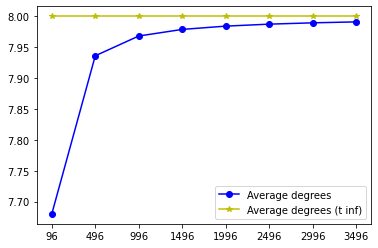

In [38]:
fig, ax = plt.subplots()
x_ticks=list(range(0, len(t)))
x_labels=[str(i) for i in t]
ax.plot(x_ticks, ave_degrees, 'b',marker='o')
ax.plot(x_ticks, ave_degrees_lim, 'y', marker='*')
ax.legend(['Average degrees', 'Average degrees (t inf)'])
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.show()